# Propiedades empíricas de los retornos de activos:  Hechos estilizados de los retornos financieros y problemas estadísticos

## ¿Qué son los hechos estilizados?

De acuerdo con Rama Cont, los llamados hechos estilizados ("$\textit{stylized facts}$"), son  aquellas propiedades estadísticas no tan triviales que podemos encontrar en los activos financieros; estas propiedades son comunes entre una gran variedad de instrumentos, mercados y periodos de tiempo.

Entonces pues, los hechos estilizados son obtenidos tomando un común denominador entre las propiedades observadas al estudiar diferentes mercados e instrumentos. Obviamente, al hacer eso uno **gana en generalidad, pero tiende a perder en precisión** de los enunciados que uno puede hacer acerca de los retornos de los activos. De hecho, los hechos estilizados son usualmente formulados en términos de propiedades cualitativas de los retornos de activos, y puede que no sean lo suficientemente precisos como para distinguir entre diferentes modelos paramétricos. Sin embargo, veremos que, aunque cualitativos, estos hechos estilizados son tan restictivos que no es fácil exhibir inclusive un proceso estocástico que posea el mismo conjunto de propiedades que uno debería de tener para reproducirlos con un modelo. 

## ¿Cuáles son estos?

Como vimos en clase, y tal como menciona Rama Cont en su artículo "$\textit{Empirical properties of asset returns: stylized facts and statistical issues.}$", **estableciendo un conjunto de hechos estadísticos estilizados los cuales son comunes entre un gran conjunto de activos financieros, podemos encontrar**:

1. Ausencia de autocorrelaciones: Las autocorrelaciones (lineales) de retornos de activos son frecuentemente insignificantes.
2. Colas pesadas: La distribución incondicional de retornos de activos parece tener colas del tipo Pareto.
3. Ganar/perder asimetría: Uno observa picos más largos hacia abajo, que no son igual de largos que los movimientos hacia arriba.
4. Gausianidad agregacional: Mientras uno incrementa el tiempo de escala t sobre el cual los retornos son calculados, su distribución se parece más y más cada vez a una distribución normal.
5. Intermitencia: Los retornos muestran, a cualquier escala de tiempo, un alto grado de variabilidad. Esto está cuantificado por la presencia de estallidos irregulares en la series de tiempo para una amplia variedad de estimadores de volatilidad.
6. Clustering de volatilidad: Diferentes medidas de volatilidad muestran una autocorrelación positiva sobre varios días los cuales cuantifican el hecho de que eventos de alta volatilidad tienden a agruparse en el tiempo. **Los cambios grandes van seguidos de cambios grandes, en signo igual o contrario. Los cambios pequeños van seguidos de cambios pequeños en signo igual o contrario.**
7. Colas pesadas condicionales: Incluso después de corregir los retornos para los clusterings de volatilidad (Por ejemplo, vía modelos del tipo GARCH), la serie de tiempo de los residuales siguen exhibiendo colas pesadas. Sin embargo, estas son menos pesadas.
8. Lento decaemiento de la autocorrelación en el valor absoluto de los retornos: La función de autocorrelación (ACF) de los retornos absolutos decae lentamente como función del tiempo de lag.
9. Efecto de apalancamiento: La mayoría de las medidas de volatilidad de un activo están negativamente correlacionadas con los retornos de dicho activo.
10. Correlación volumen/volatilidad: El volumen operado está correlacionado con todas las medidas de volatilidad.

#### En resumen...

* Los retornos **no siguen una distribución normal** en tiempos cortos, o medianos
* Los retornos en **periodos largos** sí presentan una distribución normal
* Los returnos **usualmente** no están correlacionados
* Los retornos **absolutos** están fuertemente correlacionados
* La volatilidad presenta clusteres y fuertemente persistentes

## Verificación con un activo 'real'

Trabajaremos con los retornos de las [acciones de américa móvil](https://finance.yahoo.com/quote/AMX?p=AMX&.tsrc=fin-srch) para este ejercicio. Como breve introducción a la compañía, para dar un poco de 'contexto'; esta es un gigante en la telefonía en América Latina, perteneciente a Carlos Slim

### ¿Cómo accedemos a la información?

Existen dos maneras muy sencillas de acceder a la información histórica de los precios de los activos financieros:

#### 1. A través de [Yahoo! finance](https://finance.yahoo.com/https://finance.yahoo.com/) (Forma $\textit{manual}$ )

Es un sitio en el que podemos encontrar de manera gratuita información de activos financieros, además de noticias de mercado (La mayoría de la información de este sitio se concentra en el mercado estadounidense). 

La manera de acceder es:
1. Entramos a [`Yahoo! finance`](https://finance.yahoo.com/)
2. Damos click en la barra de búsqueda (donde dice `search for news, symbols or companies`, al lado de la lupa)
3. Escribimos el nombre de la compañía (En nuestro caso, `América Móvil`). Hay 2, porque uno cotiza en México y otro en Estados Unidos. Elegimos la que dice NYQ. O bien, con la clave de pizarra (`AMX`, en nuestro caso)
4. Una vez que estamos en la página con la información de la compañia, nos vamos a `Historical Data`
5. Donde dice `Time period`, elegimos el periodo deseado. En nuestro caso, elegiremos el máximo (`Max`)
6. Hacemos click en `Apply`
7. Descargamos haciendo click en `download`. Nos descargará un `.csv` con la información deseada

Recomiendo poner el código en la misma carpeta donde pongamos el archivo `.csv`, para que sea más fácil leer el archivo

#### 2. A través de la paquetería [yfinance](https://pypi.org/project/yfinance/) (forma $\textit{automática}$)

[yfinance](https://pypi.org/project/yfinance/) es una paquetería que nos permite establecer una conexión con yahoo! finance de manera $\textit{automática}$, para optimizar o facilitar el proceso de obtener y/o descargar la información de los activos que deseemos.

In [1]:
#Por favor, corran esta línea para instalar yfinance.
!pip install yfinance

#### Importamos librerías

In [2]:
#Para los dataframes
import pandas as pd 
#Para las operaciones
import numpy as np
#Para visualizar.
import matplotlib.pyplot as plt
#Para darle un estilo más bonito a las gráficas
import seaborn as sns
sns.set() #Con esto 'configuramos' el estilo de seaborn
#Para obtener la información de yahoo! finance
import yfinance as yf
#Para lo relacionado a estadística
from scipy import stats #Momentos, tests y demás
from statsmodels.tsa import stattools as st
from statsmodels.graphics import tsaplots as tsap #Gráficos de series de tiempo
from statsmodels.graphics import gofplots as gofp #Gráficos de pruebas de bondad de ajuste, como qq-plot

#### Leemos el `.csv` que viene en la carpeta

In [3]:
info_cruda = pd.read_csv("AMX.csv")
info_cruda.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5292,2022-02-24,17.440001,17.750000,17.139999,17.709999,17.709999,2732200
5293,2022-02-25,17.840000,18.170000,17.820000,18.040001,18.040001,2016200
5294,2022-02-28,17.879999,18.160000,17.450001,18.120001,18.120001,4499500
5295,2022-03-01,18.020000,18.400000,17.930000,18.250000,18.250000,2699300
5296,2022-03-02,18.320000,18.620001,18.150000,18.600000,18.600000,1532000


### Con la librería no necesitamos descargar el `.csv`

In [4]:
AMXL = yf.Ticker("AMX")
datos_amxl = AMXL.history(period="max")
datos_amxl.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-17,19.299999,19.980000,19.299999,19.780001,4065400,0.0,0.0
2022-03-18,19.580000,20.059999,19.200001,19.930000,7097100,0.0,0.0
2022-03-21,20.000000,20.110001,19.650000,19.840000,1433700,0.0,0.0
2022-03-22,19.889999,20.600000,19.889999,20.459999,4511200,0.0,0.0
2022-03-23,20.459999,20.770000,20.420000,20.430000,2431100,0.0,0.0


Si queremos fechas específicas, usaríamos:
`AMXL.history(start="aaaa-mm-dd",end="aaaa-mm-dd")`

In [5]:
AMXL2 = yf.Ticker("AMX")
datos_amxl = AMXL2.history(start="2022-03-22",end="2022-03-24") #La fecha de término debe ser un día DESPUÉS, t+1
datos_amxl.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-22,19.889999,20.60,19.889999,20.459999,4511200,0,0
2022-03-23,20.459999,20.77,20.420000,20.430000,2431100,0,0


In [6]:
datos_amxl.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-22,19.889999,20.60,19.889999,20.459999,4511200,0,0
2022-03-23,20.459999,20.77,20.420000,20.430000,2431100,0,0


### ¿Qué información nos están mostrando?

* `Date` es la fecha a la que pertenece la información
* `Open` es el precio con el que abrió dicho activo en el mercado ese día.
* `High` es el precio más alto que alcanzó dicho activo en el mercado ese día.
* `Low` es el precio más bajo que alcanzó dicho activo en el mercado ese día.
* `Close` es el precio con el que cerró dicho activo en el mercado ese día.
* `Adj Close` es el precio con el que cerró dicho activo en el mercado ese día, después de ajustes para todos los splits aplicables (Cuando aumentan el número de acciones sin aumentar el importe en circulación) y distribuciones de dividendos. Los datos son ajustados usando los correspondientes y apropiados factores de split y dividentos, adheriendose a los [estándares del Center for Research in Security Prices.](https://www.crsp.org/products/documentation/crsp-calculations)
* `Volume` es la cantidad de acciones que fueron operadas en el mercado ese día.

### ¿Cómo consideraremos los tiempos en el mercado?

Por los días que abre el mercado, haremos las siguientes consideraciones:
* Los días (evidentemente) los seguiremos considerando `iguales`.
* Las semanas serán de `5 días`.
* Los meses serán de `28 días`.
* Los años serán de `252 días`.

#### Primero revisemos si hay `na`

In [7]:
#Con el csv
es_Na=info_cruda[pd.isna(info_cruda)]
renglon_tiene_Na = es_Na.any(axis=1)
renglones_con_Na = info_cruda[renglon_tiene_Na]
print("entradas con na",renglones_con_Na)
print("Hay ",len(renglones_con_Na), " entradas con na")

entradas con na Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
Hay  0  entradas con na


In [8]:
#con yahoo!
es_Na_y=datos_amxl[pd.isna(datos_amxl)]
renglon_tiene_Na_y = es_Na_y.any(axis=1)
renglones_con_Na_y = datos_amxl[renglon_tiene_Na_y]
print("entradas con na",renglones_con_Na_y)
print("Hay ",len(renglones_con_Na_y), " entradas con na")

entradas con na Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
Hay  0  entradas con na


En nuestros datos, no hay `na`

#### Quitamos los `na`

In [9]:
info_cruda=info_cruda.dropna()
datos_amxl=datos_amxl.dropna()

#### Trabajaremos únicamente con la fecha (`Date`) y precios de cierre (`Close`).

In [10]:
#csv
info = pd.DataFrame() #Si no lo hacemos así, tenemos un warning medio raro
info["fecha"] = pd.to_datetime(info_cruda["Date"], dayfirst=True) #Convertimos a fecha
info["precio"] = info_cruda["Close"]
info.sort_values(by='fecha', ascending=True) #Ordenamos por fecha
info.tail() #Visualizamos

,fecha,precio
5292,2022-02-24,17.709999
5293,2022-02-25,18.040001
5294,2022-02-28,18.120001
5295,2022-03-01,18.250000
5296,2022-03-02,18.600000


In [11]:
#yahoo!
info_y = pd.DataFrame() #Si no lo hacemos así, tenemos un warning medio raro
info_y["precio"] = datos_amxl["Close"]
info_y.tail() #Visualizamos

,precio
Date,
2022-03-22,20.459999
2022-03-23,20.430000


### ¿Cómo se ve la serie de tiempo?

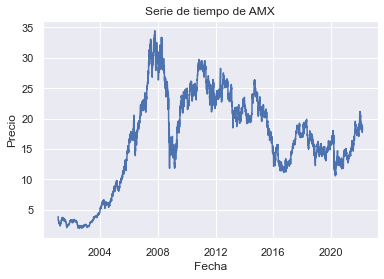

In [12]:
#csv
plt.figure()
plt.plot(info['fecha'],info['precio'])
plt.title('Serie de tiempo de AMX')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

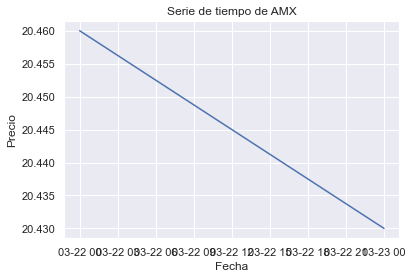

In [13]:
#yahoo!
plt.figure()
plt.plot(datos_amxl)
plt.title('Serie de tiempo de AMX')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

PD: `seaborn` le da este estilo "*más bonito*"

# Analicemos los retornos

## Retornos diarios

Los retornos logarítmos **diarios** están dados por:
$$r^{d}_{t}=ln\left(\frac{p_{t}}{p_{t-1}}\right)=\underbrace{ln(p_t)-ln(p_{t-1})}_{\text{Por propiedades de logarítmo}}$$
Donde:
* $p_t$ es el precio al tiempo $t$
* $p_{t-1}$ es el precio al tiempo $t-1$
* $r^{d}_t$ es el retorno diario a tiempo $t$

In [14]:
info_diaria=info.copy() #Trabajamos con una copia del df original
info_diaria['precio_dia_anterior'] = info_diaria['precio'].shift(1) #Desplazamos una unidad hacia atrás
#Hacemos el cociente y multiplicamos por 100 para tener el porcentaje
info_diaria['retorno_diario'] = (np.log(info_diaria['precio']/info_diaria['precio_dia_anterior']))*100 
info_diaria = info_diaria.dropna()
info_diaria = info_diaria.reset_index(drop=True)
info_diaria.head()

,fecha,precio,precio_dia_anterior,retorno_diario
0,2001-02-13,3.632813,3.867188,-6.252035
1,2001-02-14,3.382813,3.632813,-7.129967
2,2001-02-15,3.335938,3.382813,-1.395371
3,2001-02-16,3.348958,3.335938,0.389535
4,2001-02-20,3.276042,3.348958,-2.201327


### Gráfica

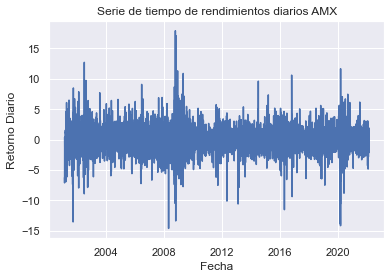

In [15]:
plt.figure()
plt.plot(info_diaria['fecha'],info_diaria['retorno_diario'])
plt.title('Serie de tiempo de rendimientos diarios AMX')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.show()

### Media, desviación estándar, Sesgo y Curtosis

In [16]:
nombre_medidas = ['Media','Desviación estándar', 'Skewness', 'Kurtosis']

In [17]:
media_diaria = np.mean(info_diaria['retorno_diario'])
desviacion_diaria= np.std(info_diaria['retorno_diario'])
skewness_diaria= stats.skew(info_diaria['retorno_diario'], bias=False)
kurtosis_diaria= stats.kurtosis(info_diaria['retorno_diario'], bias=False,fisher=False)
#Si quiero la curtosis en exceso, ponemos fisher= True
medidas_diarias= {nombre_medidas[0]: media_diaria, nombre_medidas[1]: desviacion_diaria, 
                  nombre_medidas[2]: skewness_diaria, nombre_medidas[3]: kurtosis_diaria}

medidas_diarias=pd.DataFrame(medidas_diarias, index= ["Valor(D)"])
comparacion=pd.DataFrame()
comparacion=comparacion.append(medidas_diarias)
medidas_diarias

/var/folders/f_/f1099rtj32vgbvzs_zcvsv1r0000gn/T/ipykernel_4682/3581652315.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparacion=comparacion.append(medidas_diarias)


,Media,Desviación estándar,Skewness,Kurtosis
Valor(D),0.029657,2.156552,-0.03743,8.761645


### Normalidad

La prueba de Jarque-Bera para normalidad contrasta las siguientes hipótesis:


$$H_{0}: \textbf{La población se distribuye normal}\quad \textbf{vs}\quad H_{a}: \textbf{La población no se distribuye normal}$$

In [18]:
stats.jarque_bera(info_diaria["retorno_diario"])

Jarque_beraResult(statistic=7309.909105426947, pvalue=0.0)

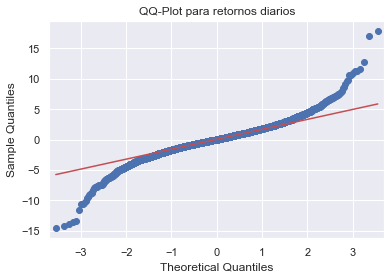

In [19]:
gofp.qqplot(info_diaria['retorno_diario'], line="q")
plt.title('QQ-Plot para retornos diarios')
plt.show()

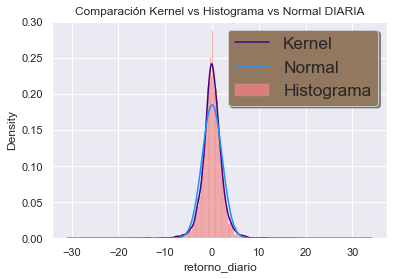

In [20]:
x_diarios = np.arange(min(info_diaria['retorno_diario']), max(info_diaria['retorno_diario']), 0.01)
fig, ax = plt.subplots()
info_diaria['retorno_diario'].plot(kind='density',label="Kernel",color="indigo")
sns.histplot(info_diaria['retorno_diario'],stat="density",label="Histograma", color="lightcoral")
plt.plot(x_diarios, stats.norm.pdf(x_diarios, media_diaria, desviacion_diaria),label="Normal",color="dodgerblue")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C5')
plt.title("Comparación Kernel vs Histograma vs Normal DIARIA")
plt.show()

### Autocorrelación

#### Sin valor absoluto

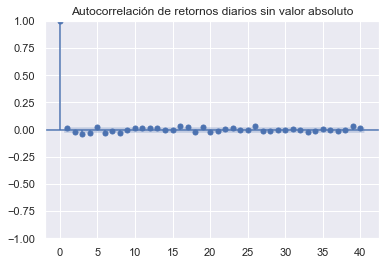

In [21]:
tsap.plot_acf(info_diaria['retorno_diario'], lags=40,title="Autocorrelación de retornos diarios sin valor absoluto")
plt.show()

#### Con valor absoluto

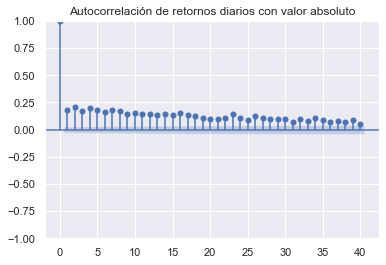

In [22]:
tsap.plot_acf(np.abs(info_diaria['retorno_diario']), lags=40,title="Autocorrelación de retornos diarios con valor absoluto")
plt.show()

## Retornos semanales

Los retornos logarítmos **semanales** están dados por:
$$r^{s}_{t}=ln\left(\frac{p_{t}}{p_{t-5}}\right)=\underbrace{ln(p_t)-ln(p_{t-5})}_{\text{Por propiedades de logarítmo}}$$
Donde:
* $p_t$ es el precio al tiempo $t$
* $p_{t-5}$ es el precio al tiempo $t-5$
* $r^{s}_t$ es el retorno semanales a tiempo $t$

In [23]:
info_semanal=info.copy()
info_semanal['precio_semana_anterior'] = info_semanal['precio'].shift(5) #Desplazamos una unidad hacia atrás
#Hacemos el cociente y multiplicamos por 100 para tener el porcentaje
info_semanal['retorno_semanal'] = np.log(info_semanal['precio']/info_semanal['precio_semana_anterior'])*100
info_semanal = info_semanal.dropna()
info_semanal = info_semanal.reset_index(drop=True)
info_semanal.head()

,fecha,precio,precio_semana_anterior,retorno_semanal
0,2001-02-20,3.276042,3.867188,-16.589164
1,2001-02-21,3.166667,3.632813,-13.732766
2,2001-02-22,3.132813,3.382813,-7.677629
3,2001-02-23,3.041667,3.335938,-9.234818
4,2001-02-26,3.033854,3.348958,-9.881549


### Gráfica

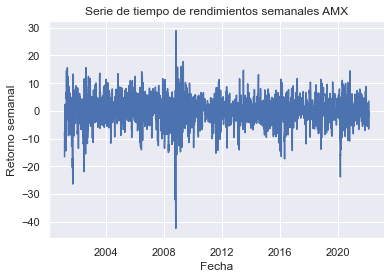

In [24]:
plt.figure()
plt.plot(info_semanal['fecha'],info_semanal['retorno_semanal'])
plt.title('Serie de tiempo de rendimientos semanales AMX')
plt.xlabel('Fecha')
plt.ylabel('Retorno semanal')
plt.show()

### Media, desviación estándar, Sesgo y Curtosis

In [25]:
media_semanal = np.mean(info_semanal['retorno_semanal'])
desviacion_semanal= np.std(info_semanal['retorno_semanal'])
skewness_semanal= stats.skew(info_semanal['retorno_semanal'], bias=False)
kurtosis_semanal= stats.kurtosis(info_semanal['retorno_semanal'], bias=False,fisher=False)

medidas_semanales= {nombre_medidas[0]: media_semanal, nombre_medidas[1]: desviacion_semanal, 
                  nombre_medidas[2]: skewness_semanal, nombre_medidas[3]: kurtosis_semanal}

medidas_semanales=pd.DataFrame(medidas_semanales, index= ["Valor(S)"])

comparacion=comparacion.append(medidas_semanales)

medidas_semanales

/var/folders/f_/f1099rtj32vgbvzs_zcvsv1r0000gn/T/ipykernel_4682/4033757239.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparacion=comparacion.append(medidas_semanales)


,Media,Desviación estándar,Skewness,Kurtosis
Valor(S),0.155261,4.704572,-0.625115,7.267413


### Normalidad

In [26]:
stats.jarque_bera(info_semanal['retorno_semanal'])

Jarque_beraResult(statistic=4350.2333390813155, pvalue=0.0)

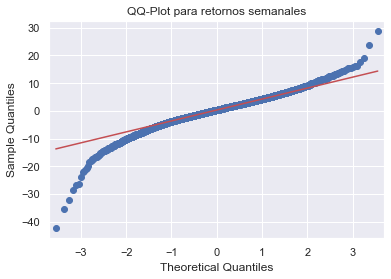

In [27]:
gofp.qqplot(info_semanal['retorno_semanal'], line="q")
plt.title('QQ-Plot para retornos semanales')
plt.show()

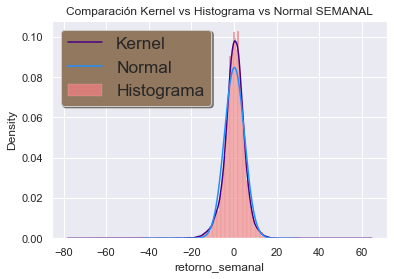

In [28]:
x_semanales = np.arange(min(info_semanal['retorno_semanal']), max(info_semanal['retorno_semanal']), 0.01)
fig, ax = plt.subplots()
info_semanal['retorno_semanal'].plot(kind='density',label="Kernel",color="indigo")
sns.histplot(info_semanal['retorno_semanal'],stat="density",label="Histograma", color="lightcoral")
plt.plot(x_semanales, stats.norm.pdf(x_semanales, media_semanal, desviacion_semanal),label="Normal",color="dodgerblue")
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C5')
plt.title("Comparación Kernel vs Histograma vs Normal SEMANAL")
plt.show()

### Autocorrelación

#### Sin valor absoluto

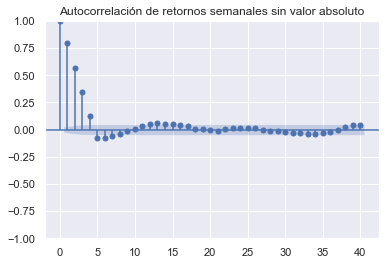

In [29]:
tsap.plot_acf(info_semanal['retorno_semanal'], lags=40,title="Autocorrelación de retornos semanales sin valor absoluto")
plt.show()

#### Con valor absoluto

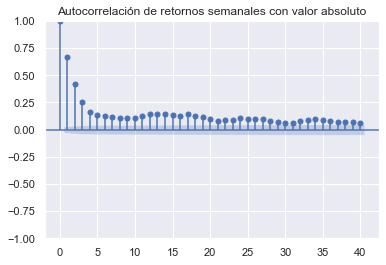

In [30]:
tsap.plot_acf(np.abs(info_semanal['retorno_semanal']), lags=40,title="Autocorrelación de retornos semanales con valor absoluto")
plt.show()

## Retornos mensuales

Los retornos logarítmos **mensuales** están dados por:
$$r^{m}_{t}=ln\left(\frac{p_{t}}{p_{t-28}}\right)=\underbrace{ln(p_t)-ln(p_{t-28})}_{\text{Por propiedades de logarítmo}}$$
Donde:
* $p_t$ es el precio al tiempo $t$
* $p_{t-28}$ es el precio al tiempo $t-28$
* $r^{m}_t$ es el retorno mensual a tiempo $t$

### Cálculo de rendimientos

In [31]:
info_mensual=info.copy()
info_mensual['precio_mes_anterior'] = info_mensual['precio'].shift(28) #Desplazamos una unidad hacia atrás
#Hacemos el cociente y multiplicamos por 100 para tener el porcentaje
info_mensual['retorno_mensual'] = np.log(info_mensual['precio']/info_mensual['precio_mes_anterior'])*100
info_mensual = info_mensual.dropna()
info_mensual = info_mensual.reset_index(drop=True)
info_mensual.head()

,fecha,precio,precio_mes_anterior,retorno_mensual
0,2001-03-23,2.492188,3.867188,-43.936659
1,2001-03-26,2.460938,3.632813,-38.946470
2,2001-03-27,2.479167,3.382813,-31.078500
3,2001-03-28,2.437500,3.335938,-31.378098
4,2001-03-29,2.348958,3.348958,-35.467743


### Gráfica

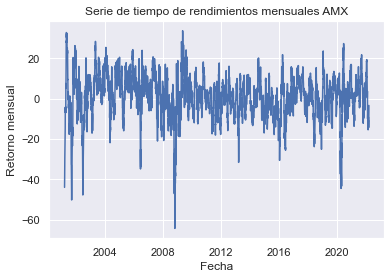

In [32]:
plt.figure()
plt.plot(info_mensual['fecha'],info_mensual['retorno_mensual'])
plt.title('Serie de tiempo de rendimientos mensuales AMX')
plt.xlabel('Fecha')
plt.ylabel('Retorno mensual')
plt.show()

### Media, desviación, sesgo y curtosis

In [33]:
media_mensual = np.mean(info_mensual['retorno_mensual'])
desviacion_mensual= np.std(info_mensual['retorno_mensual'])
skewness_mensual= stats.skew(info_mensual['retorno_mensual'], bias=False)
kurtosis_mensual= stats.kurtosis(info_mensual['retorno_mensual'], bias=False,fisher=False)

medidas_mensuales= {nombre_medidas[0]: media_mensual, nombre_medidas[1]: desviacion_mensual, 
                  nombre_medidas[2]: skewness_mensual, nombre_medidas[3]: kurtosis_mensual}

medidas_mensuales=pd.DataFrame(medidas_mensuales, index= ["Valor(M)"])

comparacion=comparacion.append(medidas_mensuales)

medidas_mensuales

/var/folders/f_/f1099rtj32vgbvzs_zcvsv1r0000gn/T/ipykernel_4682/465108085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparacion=comparacion.append(medidas_mensuales)


,Media,Desviación estándar,Skewness,Kurtosis
Valor(M),0.969783,10.663579,-0.758921,5.404612


### Normalidad

In [34]:
stats.jarque_bera(info_mensual['retorno_mensual'])

Jarque_beraResult(statistic=1771.3189007301548, pvalue=0.0)

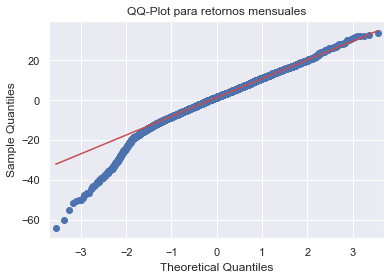

In [35]:
gofp.qqplot(info_mensual['retorno_mensual'], line="q")
plt.title('QQ-Plot para retornos mensuales')
plt.show()

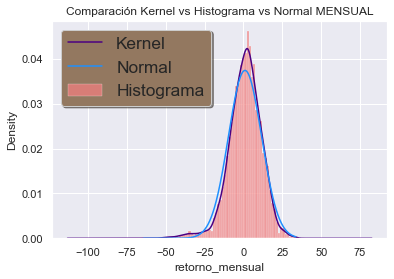

In [36]:
x_mensuales = np.arange(min(info_mensual['retorno_mensual']), max(info_mensual['retorno_mensual']), 0.01)
fig, ax = plt.subplots()
info_mensual['retorno_mensual'].plot(kind='density',label="Kernel",color="indigo")
sns.histplot(info_mensual['retorno_mensual'],stat="density",label="Histograma", color="lightcoral")
plt.plot(x_mensuales, stats.norm.pdf(x_mensuales, media_mensual, desviacion_mensual),label="Normal",color="dodgerblue")
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C5')
plt.title("Comparación Kernel vs Histograma vs Normal MENSUAL")
plt.show()

### Autocorrelación

#### Sin valor absoluto

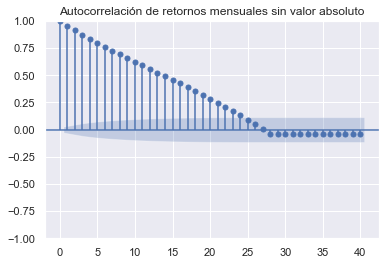

In [37]:
tsap.plot_acf(info_mensual['retorno_mensual'], lags=40,title="Autocorrelación de retornos mensuales sin valor absoluto")
plt.show()

#### Con valor absoluto

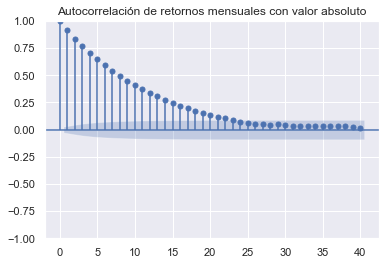

In [38]:
tsap.plot_acf(np.abs(info_mensual['retorno_mensual']), lags=40,title="Autocorrelación de retornos mensuales con valor absoluto")
plt.show()

## Retornos anuales

Los retornos logarítmos **anuales** están dados por:
$$r^{a}_{t}=ln\left(\frac{p_{t}}{p_{t-252}}\right)=\underbrace{ln(p_t)-ln(p_{t-252})}_{\text{Por propiedades de logarítmo}}$$
Donde:
* $p_t$ es el precio al tiempo $t$
* $p_{t-252}$ es el precio al tiempo $t-252$
* $r^{a}_t$ es el retorno diario a tiempo $t$

In [39]:
info_anual=info.copy()
info_anual['precio_year_anterior'] = info_anual['precio'].shift(252) #Desplazamos una unidad hacia atrás
#Hacemos el cociente y multiplicamos por 100 para tener el porcentaje
info_anual['retorno_anual'] = np.log(info_anual['precio']/info_anual['precio_year_anterior'])*100
info_anual = info_anual.dropna()
info_anual = info_anual.reset_index(drop=True)
info_anual.head()

,fecha,precio,precio_year_anterior,retorno_anual
0,2002-02-19,2.991667,3.867188,-25.669687
1,2002-02-20,2.998333,3.632813,-19.195081
2,2002-02-21,2.991667,3.382813,-12.287685
3,2002-02-22,2.981667,3.335938,-11.227136
4,2002-02-25,3.038333,3.348958,-9.734024


### Gráfica

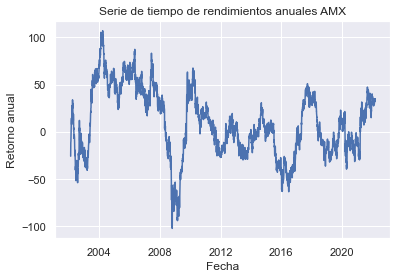

In [40]:
plt.figure()
plt.plot(info_anual['fecha'],info_anual['retorno_anual'])
plt.title('Serie de tiempo de rendimientos anuales AMX')
plt.xlabel('Fecha')
plt.ylabel('Retorno anual')
plt.show()

### Media, desviación, sesgo y curtosis

In [41]:
media_anual = np.mean(info_anual['retorno_anual'])
desviacion_anual= np.std(info_anual['retorno_anual'])
skewness_anual= stats.skew(info_anual['retorno_anual'], bias=False)
kurtosis_anual= stats.kurtosis(info_anual['retorno_anual'], bias=False,fisher=False)

medidas_anuales= {nombre_medidas[0]: media_anual, nombre_medidas[1]: desviacion_anual, 
                  nombre_medidas[2]: skewness_anual, nombre_medidas[3]: kurtosis_anual}

medidas_anuales=pd.DataFrame(medidas_anuales, index= ["Valor(A)"])

comparacion=comparacion.append(medidas_anuales)

medidas_anuales

/var/folders/f_/f1099rtj32vgbvzs_zcvsv1r0000gn/T/ipykernel_4682/2411846416.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparacion=comparacion.append(medidas_anuales)


,Media,Desviación estándar,Skewness,Kurtosis
Valor(A),8.676719,35.430095,0.026057,2.605569


### Normalidad

In [42]:
stats.jarque_bera(info_anual['retorno_anual'])

Jarque_beraResult(statistic=33.40629879827114, pvalue=5.570759187278895e-08)

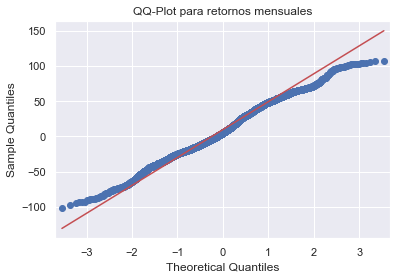

In [43]:
gofp.qqplot(info_anual['retorno_anual'], line="q")
plt.title('QQ-Plot para retornos mensuales')
plt.show()

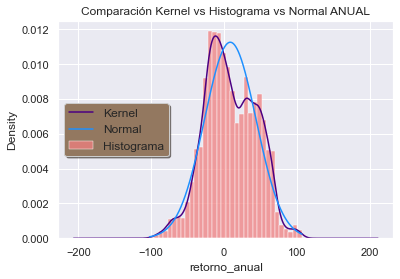

In [44]:
x_anuales = np.arange(min(info_anual['retorno_anual']), max(info_anual['retorno_anual']), 0.01)
fig, ax = plt.subplots()
info_anual['retorno_anual'].plot(kind='density',label="Kernel",color="indigo")
sns.histplot(info_anual['retorno_anual'],stat="density",label="Histograma", color="lightcoral")
plt.plot(x_anuales, stats.norm.pdf(x_anuales, media_anual, desviacion_anual),label="Normal",color="dodgerblue")
legend = ax.legend(loc='center left', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C5')
plt.title("Comparación Kernel vs Histograma vs Normal ANUAL")
plt.show()

### Autocorrelación

#### Sin valor absoluto

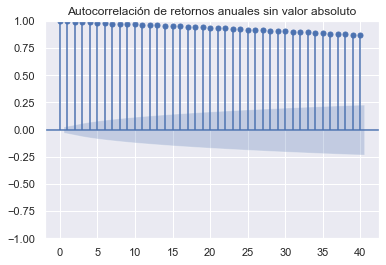

In [45]:
tsap.plot_acf(info_anual['retorno_anual'], lags=40,title="Autocorrelación de retornos anuales sin valor absoluto")
plt.show()

#### Con valor absoluto

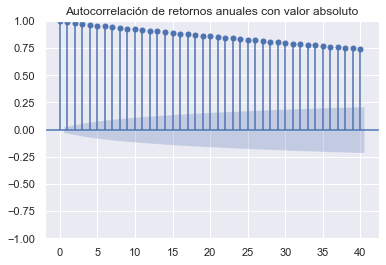

In [46]:
tsap.plot_acf(np.abs(info_anual['retorno_anual']), lags=40,title="Autocorrelación de retornos anuales con valor absoluto")
plt.show()

## Comparando los momentos:

In [47]:
comparacion

,Media,Desviación estándar,Skewness,Kurtosis
Valor(D),0.029657,2.156552,-0.037430,8.761645
Valor(S),0.155261,4.704572,-0.625115,7.267413
Valor(M),0.969783,10.663579,-0.758921,5.404612
Valor(A),8.676719,35.430095,0.026057,2.605569


# Fuentes: 

1. [Cont, R. (2001). Empirical properties of asset returns: stylized facts and statistical issues. Quantitative finance, 1(2), 223.](http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf)
2. [Cont, R. (2007). Volatility clustering in financial markets: empirical facts and agent-based models. In Long memory in economics (pp. 289-309). Springer, Berlin, Heidelberg.](http://rama.cont.perso.math.cnrs.fr/pdf/clustering.pdf)
3. [Yahoo Finance](https://finance.yahoo.com/quote/AMX/history?p=AMX) (Consultado el miércoles 23 de marzo de 2022)
4. Documentación de [yfinance](https://pypi.org/project/yfinance/) (Consultado el miércoles 23 de marzo de 2022) 